In [1]:
import pandas as pd
import numpy as np
import re
import math
import spacy
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction import text
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

In [139]:
nlp = spacy.load("en_core_web_sm")

# 1 Data

## 1.1 Import Data

In [140]:
def getData():
    data = pd.read_csv("../data/names/Popular_Baby_Names.csv",delimiter=',')
    data = data.rename(columns={"Child's First Name": "Name"})
    columns = ['Name', 'Gender', 'Count']
    data = data[columns]
    data['Name'] = data['Name'].str.lower()
    data['Gender'] = data['Gender'].str.lower()
    return data

In [141]:
data = getData()
data

,Name,Gender,Count
0,geraldine,female,13
1,gia,female,21
2,gianna,female,49
3,giselle,female,38
4,grace,female,36
...,...,...,...
29459,alayna,female,10
29460,yaritza,female,12
29461,mendel,male,42
29462,isaac,male,21


## 1.2 Data Analysis

### 1.2.1 Number of Male and Female names

In [142]:
def numberOfMF(data):
    df = data.groupby('Gender')['Name'].count()
    df = pd.DataFrame({'Names': [df[0], df[1]]}, index=['Female', 'Male'])
    plot = df.plot.pie(subplots=True, figsize=(11, 6), colors = ['#ffb3e6','#c2c2f0'], 
                       autopct = "%.2f%%", labeldistance=1.15)
#   wedgeprops = {'linewidth':1.5, 'edgecolor':'white'}

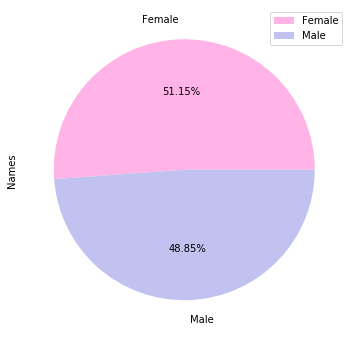

In [143]:
numberOfMF(data)

### 1.2.2 Segregating male and female data

In [144]:
male = data.loc[data['Gender'] == 'male']
female = data.loc[data['Gender'] == 'female']

In [145]:
male

,Name,Gender,Count
545,aarav,male,15
546,aaron,male,51
547,abdul,male,20
548,abdullah,male,30
549,adam,male,28
...,...,...,...
29455,cheskel,male,20
29456,arthur,male,29
29458,joel,male,32
29461,mendel,male,42


In [146]:
female

,Name,Gender,Count
0,geraldine,female,13
1,gia,female,21
2,gianna,female,49
3,giselle,female,38
4,grace,female,36
...,...,...,...
29454,nathalie,female,11
29457,joselyn,female,12
29459,alayna,female,10
29460,yaritza,female,12


### 1.2.3 Binary representation using Gender Value

In [147]:
def checkGender(gender):
    if gender == "female":
        return 1
    return 0

In [148]:
data["GenderCode"] = data["Gender"].apply(checkGender)
data

,Name,Gender,Count,GenderCode
0,geraldine,female,13,1
1,gia,female,21,1
2,gianna,female,49,1
3,giselle,female,38,1
4,grace,female,36,1
...,...,...,...,...
29459,alayna,female,10,1
29460,yaritza,female,12,1
29461,mendel,male,42,0
29462,isaac,male,21,0


# 2 Features based on speaker name

## 2.1 Name ends with vowel or not 

### 2.1.1 Creating the feature

In [149]:
def checkEnd(name):
    if name[-1] in "aeiou":
        return "vowel"
    return "consonant"

In [150]:
data["EndsWith"] = data["Name"].apply(checkEnd)
data

,Name,Gender,Count,GenderCode,EndsWith
0,geraldine,female,13,1,vowel
1,gia,female,21,1,vowel
2,gianna,female,49,1,vowel
3,giselle,female,38,1,vowel
4,grace,female,36,1,vowel
...,...,...,...,...,...
29459,alayna,female,10,1,vowel
29460,yaritza,female,12,1,vowel
29461,mendel,male,42,0,consonant
29462,isaac,male,21,0,consonant


### 2.1.2 Verification of the feature: Name ends with vowel or not 

In [151]:
def compare(group):
    return data.groupby([group])["GenderCode"].sum()*100/data.groupby([group])["GenderCode"].count()

In [152]:
print(compare("EndsWith"))

EndsWith
consonant    31.702920
vowel        78.410758
Name: GenderCode, dtype: float64


*We see that roughly 30% of names ending with consonants, and 80% of names ending with vowels, are female.*

In [153]:
def getRatio(data, col, val1, val2):
    temp = data[data['GenderCode'] == 1]
    f_v = temp[temp[col] == val1].shape[0]
    f_c = temp[temp[col] == val2].shape[0]
    
    temp = data[data['GenderCode'] == 0]
    m_v = temp[temp[col] == val1].shape[0]
    m_c = temp[temp[col] == val2].shape[0]

    return f_v, f_c, m_v, m_c

In [154]:
def plotRatio(f_v, f_c, m_v, m_c, idx1, idx2, title):
    df = pd.DataFrame({'Female': [f_v, f_c], 'Male': [m_v, m_c]}, index=[idx1, idx2])
    plot = df.plot.pie(subplots=True, figsize=(11, 6), colors = ['#66b3ff','#99ff99'],
                      autopct = "%.2f%%", labeldistance=1.15, title=title)

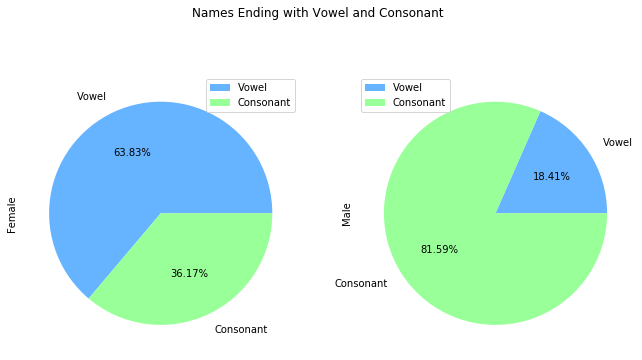

In [155]:
f_v, f_c, m_v, m_c = getRatio(data, 'EndsWith', 'vowel', 'consonant')
plotRatio(f_v, f_c, m_v, m_c, 'Vowel', 'Consonant', 'Names Ending with Vowel and Consonant')

## 2.2 Name starts with vowel or not

### 2.2.1 Creating the feature

In [156]:
def checkEnd(name):
    if name[0] in "aeiou":
        return "vowel"
    return "consonant"

In [157]:
data["BeginsWith"] = data["Name"].apply(checkEnd)
data

,Name,Gender,Count,GenderCode,EndsWith,BeginsWith
0,geraldine,female,13,1,vowel,consonant
1,gia,female,21,1,vowel,consonant
2,gianna,female,49,1,vowel,consonant
3,giselle,female,38,1,vowel,consonant
4,grace,female,36,1,vowel,consonant
...,...,...,...,...,...,...
29459,alayna,female,10,1,vowel,vowel
29460,yaritza,female,12,1,vowel,consonant
29461,mendel,male,42,0,consonant,consonant
29462,isaac,male,21,0,consonant,vowel


### 2.2.2 Verification of the feature: Name ends with vowel or not 

In [158]:
print(compare("BeginsWith"))

BeginsWith
consonant    49.933495
vowel        54.627333
Name: GenderCode, dtype: float64


**We see that roughly 50% of names ending with consonants, and 55% of names ending with vowels, are female.**

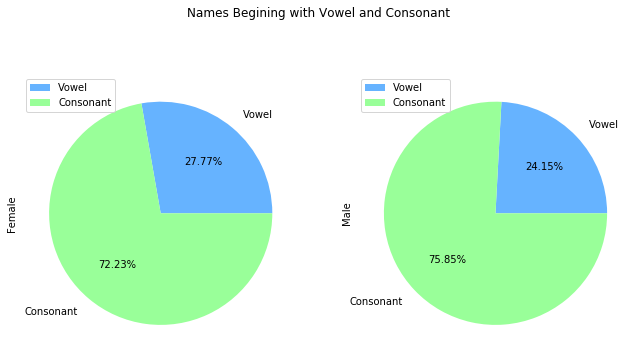

In [159]:
f_v, f_c, m_v, m_c = getRatio(data, 'BeginsWith', 'vowel', 'consonant')
plotRatio(f_v, f_c, m_v, m_c, 'Vowel', 'Consonant', 'Names Begining with Vowel and Consonant')

## 2.3 Length of the name

### 2.3.1 Finding the threshold

In [160]:
def getLength(name):
    return len(name)

In [161]:
data["Length"] = data["Name"].apply(getLength)
data

,Name,Gender,Count,GenderCode,EndsWith,BeginsWith,Length
0,geraldine,female,13,1,vowel,consonant,9
1,gia,female,21,1,vowel,consonant,3
2,gianna,female,49,1,vowel,consonant,6
3,giselle,female,38,1,vowel,consonant,7
4,grace,female,36,1,vowel,consonant,5
...,...,...,...,...,...,...,...
29459,alayna,female,10,1,vowel,vowel,6
29460,yaritza,female,12,1,vowel,consonant,7
29461,mendel,male,42,0,consonant,consonant,6
29462,isaac,male,21,0,consonant,vowel,5


In [162]:
def getStat(data, group):
    male = data.loc[data['Gender'] == 'male']
    female = data.loc[data['Gender'] == 'female']
    maleLen = pd.DataFrame(male.groupby([group]).count(),  columns=['Count']).reset_index(level=group)
    femaleLen = pd.DataFrame(female.groupby([group]).count(),  columns=['Count']).reset_index(level=group)
    index = maleLen[group]
    df = pd.DataFrame({'Female': femaleLen['Count'], 'Male': maleLen['Count']}, index=index)
    ax = df.plot.bar(figsize=(12,4),rot=0, color={"Female": "#ffb3e6", "Male": "#c2c2f0"}, width=0.7, grid=1, ylabel="Count of Names")

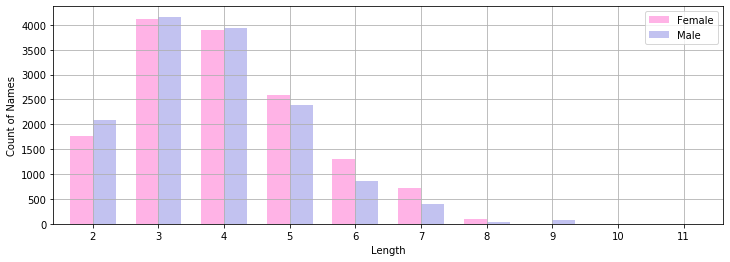

In [163]:
getStat(data, 'Length')

### 2.3.2 Creating the feature

In [164]:
def checkLength(name):
    if len(name) > 4:
        return "long"
    return "short"

In [165]:
data["LengthClass"] = data["Name"].apply(checkLength)
data

,Name,Gender,Count,GenderCode,EndsWith,BeginsWith,Length,LengthClass
0,geraldine,female,13,1,vowel,consonant,9,long
1,gia,female,21,1,vowel,consonant,3,short
2,gianna,female,49,1,vowel,consonant,6,long
3,giselle,female,38,1,vowel,consonant,7,long
4,grace,female,36,1,vowel,consonant,5,long
...,...,...,...,...,...,...,...,...
29459,alayna,female,10,1,vowel,vowel,6,long
29460,yaritza,female,12,1,vowel,consonant,7,long
29461,mendel,male,42,0,consonant,consonant,6,long
29462,isaac,male,21,0,consonant,vowel,5,long


### 2.3.2 Verification of the feature: Name ends with vowel or not 

In [166]:
print(compare("LengthClass"))

LengthClass
long     51.786005
short    47.972973
Name: GenderCode, dtype: float64


*We see that roughly 50% of names ending with consonants, and 55% of names ending with vowels, are female.*

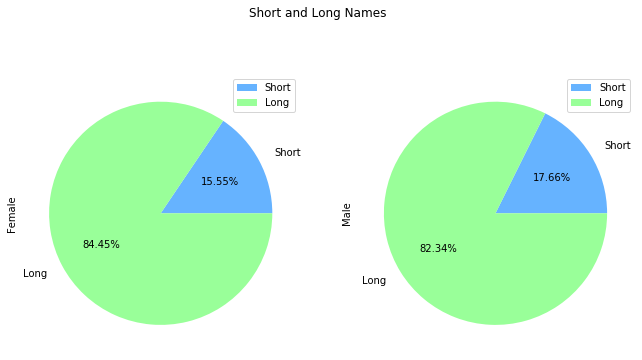

In [167]:
f_s, f_l, m_s, m_l = getRatio(data, 'LengthClass', 'short', 'long')
plotRatio(f_s, f_l, m_s, m_l, 'Short', 'Long', 'Short and Long Names')

## 2.4 Count of vowels and consonants

### 2.4.1 Count Vowels and Consonants in a name

In [168]:
def letterClass(name):
    name_list = [x for x in name]
    vowel_counter = 0
    consonant_counter = 0
    for letter in name_list:
        if letter in ['a','e','i','o','u']:
            vowel_counter+=1
        else:
            consonant_counter+=1
    
    return vowel_counter, consonant_counter

In [169]:
data['VowelCount'] = data['Name'].apply(lambda x: letterClass(x)[0])
data['ConsonantCount'] = data['Name'].apply(lambda x: letterClass(x)[1])

In [170]:
data

,Name,Gender,Count,GenderCode,EndsWith,BeginsWith,Length,LengthClass,VowelCount,ConsonantCount
0,geraldine,female,13,1,vowel,consonant,9,long,4,5
1,gia,female,21,1,vowel,consonant,3,short,2,1
2,gianna,female,49,1,vowel,consonant,6,long,3,3
3,giselle,female,38,1,vowel,consonant,7,long,3,4
4,grace,female,36,1,vowel,consonant,5,long,2,3
...,...,...,...,...,...,...,...,...,...,...
29459,alayna,female,10,1,vowel,vowel,6,long,3,3
29460,yaritza,female,12,1,vowel,consonant,7,long,3,4
29461,mendel,male,42,0,consonant,consonant,6,long,2,4
29462,isaac,male,21,0,consonant,vowel,5,long,3,2


### 2.4.2 Finding Threshold

#### 2.4.2.1 Comparing number of male/female names on the basis of vowelCount and ConsonantCount

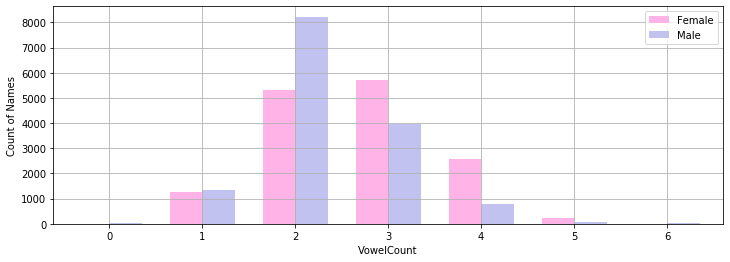

In [171]:
getStat(data, 'VowelCount')

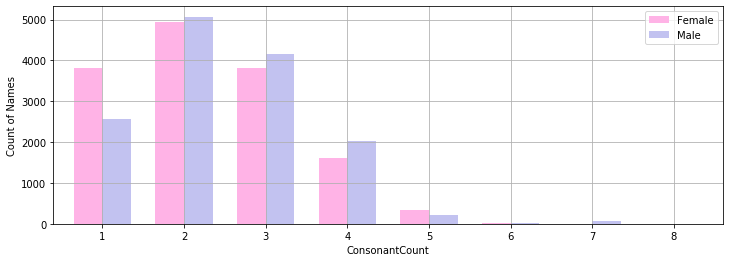

In [172]:
getStat(data, 'ConsonantCount')

*We see that more females have #vowels greater than 2 and more males have #vowels less than or equal to 2. Similarly, More males have number of consonants greater than 1*

#### 2.4.2.2 Comparing number of vowels and consonants in maleNames and femaleNames

In [173]:
def checkMoreVowels(data):
    data['vcCompare']= np.where(data['ConsonantCount'] == data['VowelCount'], 'equal', np.where(
    data['ConsonantCount'] > data['VowelCount'], 'moreConsonants', 'moreVowels')) 

In [174]:
checkMoreVowels(data)
data

,Name,Gender,Count,GenderCode,EndsWith,BeginsWith,Length,LengthClass,VowelCount,ConsonantCount,vcCompare
0,geraldine,female,13,1,vowel,consonant,9,long,4,5,moreConsonants
1,gia,female,21,1,vowel,consonant,3,short,2,1,moreVowels
2,gianna,female,49,1,vowel,consonant,6,long,3,3,equal
3,giselle,female,38,1,vowel,consonant,7,long,3,4,moreConsonants
4,grace,female,36,1,vowel,consonant,5,long,2,3,moreConsonants
...,...,...,...,...,...,...,...,...,...,...,...
29459,alayna,female,10,1,vowel,vowel,6,long,3,3,equal
29460,yaritza,female,12,1,vowel,consonant,7,long,3,4,moreConsonants
29461,mendel,male,42,0,consonant,consonant,6,long,2,4,moreConsonants
29462,isaac,male,21,0,consonant,vowel,5,long,3,2,moreVowels


In [175]:
# <------------- DO NOT DELETE ------------->
# def getStatTwo(data, sex):
#     gender = data.loc[data['Gender'] == sex]
#     ConsLen = pd.DataFrame(gender.groupby(['ConsonantCount']).count(),  columns=['Count']).reset_index(level='ConsonantCount')
#     VowLen = pd.DataFrame(gender.groupby(['VowelCount']).count(),  columns=['Count']).reset_index(level='VowelCount')

#     index = ConsLen['ConsonantCount']
#     df = pd.DataFrame({'Consonants': ConsLen['Count'], 'Vowels': VowLen['Count']}, index=index)
#     ax = df.plot.bar(figsize=(12,4),rot=0, color={"Consonants": "#99ff99", "Vowels": "#66b3ff"}, width=0.7, grid=1, ylabel="Count of {} Names".format(sex), xlabel='Count of Letters')

In [176]:
def getStatTwo(data, sex):
    gender = data.loc[data['Gender'] == sex]
    grouped = pd.DataFrame(gender.groupby(['vcCompare']).count(),  columns=['Count']).reset_index(level='vcCompare')
    print(grouped)
    index = grouped['vcCompare']
    df = pd.DataFrame({'Count': grouped['Count'], 'x':index})
    ax = df.plot.bar(x='x', y='Count', figsize=(10,4),rot=0, color= "#ff9999", width=0.5, grid=1, ylabel="Count of {} Names".format(sex), xlabel='Count of Letters')

        vcCompare  Count
0           equal   4207
1  moreConsonants   7135
2      moreVowels   3730


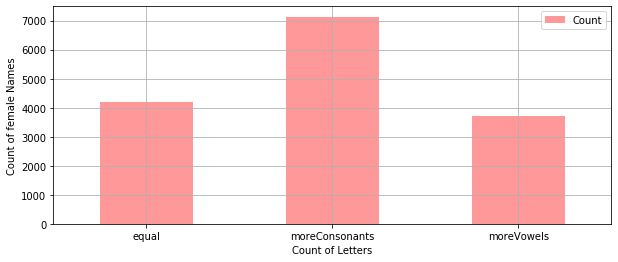

In [177]:
getStatTwo(data, 'female')

        vcCompare  Count
0           equal   3477
1  moreConsonants   9627
2      moreVowels   1288


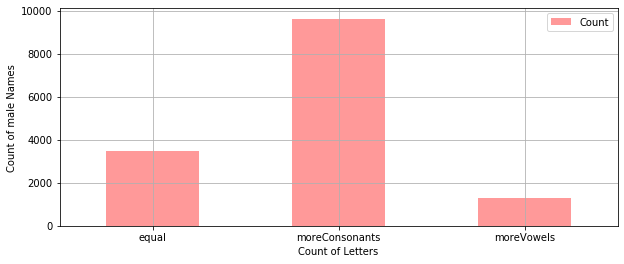

In [178]:
getStatTwo(data, 'male')

#### 2.4.2.3 Difference between the number of vowels and consonants in maleNames and femaleNames

In [179]:
def checkVCDifference(data):
    data['vcDifference']= data['ConsonantCount'] - data['VowelCount']

In [180]:
checkVCDifference(data)
data

,Name,Gender,Count,GenderCode,EndsWith,BeginsWith,Length,LengthClass,VowelCount,ConsonantCount,vcCompare,vcDifference
0,geraldine,female,13,1,vowel,consonant,9,long,4,5,moreConsonants,1
1,gia,female,21,1,vowel,consonant,3,short,2,1,moreVowels,-1
2,gianna,female,49,1,vowel,consonant,6,long,3,3,equal,0
3,giselle,female,38,1,vowel,consonant,7,long,3,4,moreConsonants,1
4,grace,female,36,1,vowel,consonant,5,long,2,3,moreConsonants,1
...,...,...,...,...,...,...,...,...,...,...,...,...
29459,alayna,female,10,1,vowel,vowel,6,long,3,3,equal,0
29460,yaritza,female,12,1,vowel,consonant,7,long,3,4,moreConsonants,1
29461,mendel,male,42,0,consonant,consonant,6,long,2,4,moreConsonants,2
29462,isaac,male,21,0,consonant,vowel,5,long,3,2,moreVowels,-1


In [181]:
def getStatDifference(data, sex):
    gender = data.loc[data['Gender'] == sex]
    grouped = pd.DataFrame(gender.groupby(['vcDifference']).count(),  columns=['Count']).reset_index(level='vcDifference')
    print(grouped)
    index = grouped['vcDifference']
    df = pd.DataFrame({'Count': grouped['Count'], 'x':index})
    ax = df.plot.bar(x='x', y='Count', figsize=(10,4),rot=0, color= "#ff9999", width=0.5, grid=1, ylabel="Count of {} Names".format(sex), xlabel='Differnce in number of Consonants and Vowels')

   vcDifference  Count
0            -3     39
1            -2    652
2            -1   3039
3             0   4207
4             1   3679
5             2   1887
6             3   1192
7             4    311
8             5     63
9             6      3


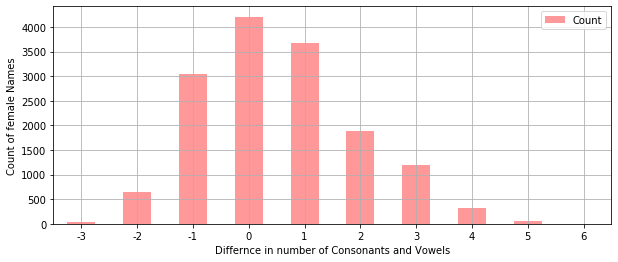

In [182]:
getStatDifference(data, 'female')

   vcDifference  Count
0            -2    118
1            -1   1170
2             0   3477
3             1   4312
4             2   3151
5             3   1929
6             4    176
7             5     59


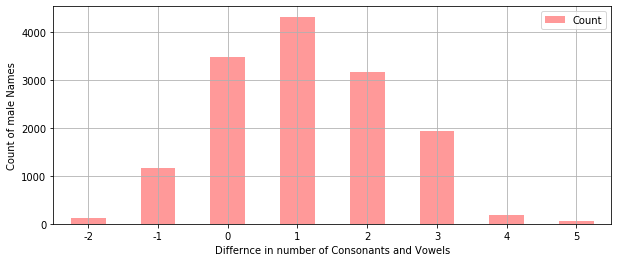

In [183]:
getStatDifference(data, 'male')

### 2.4.3 Creating the feature

#### 2.4.3.1 Creating Vowel and Consonant Count feature
This is on the basis of just the count of vowels or just the count of consonants. So, whether the vowels are high or low in number is one feature and whether the consonants are high or low in number is another feature.

In [184]:
def checkVowelCount(col):
    if col > 2:
        return 'high'
    return 'low'

def checkConsonantCount(col):
    if col > 1:
        return 'low'
    return 'high'

In [185]:
data["VowelCountClass"] = data["VowelCount"].apply(checkVowelCount)
data["ConsonantCountClass"] = data["ConsonantCount"].apply(checkConsonantCount)
data

,Name,Gender,Count,GenderCode,EndsWith,BeginsWith,Length,LengthClass,VowelCount,ConsonantCount,vcCompare,vcDifference,VowelCountClass,ConsonantCountClass
0,geraldine,female,13,1,vowel,consonant,9,long,4,5,moreConsonants,1,high,low
1,gia,female,21,1,vowel,consonant,3,short,2,1,moreVowels,-1,low,high
2,gianna,female,49,1,vowel,consonant,6,long,3,3,equal,0,high,low
3,giselle,female,38,1,vowel,consonant,7,long,3,4,moreConsonants,1,high,low
4,grace,female,36,1,vowel,consonant,5,long,2,3,moreConsonants,1,low,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29459,alayna,female,10,1,vowel,vowel,6,long,3,3,equal,0,high,low
29460,yaritza,female,12,1,vowel,consonant,7,long,3,4,moreConsonants,1,high,low
29461,mendel,male,42,0,consonant,consonant,6,long,2,4,moreConsonants,2,low,low
29462,isaac,male,21,0,consonant,vowel,5,long,3,2,moreVowels,-1,high,low


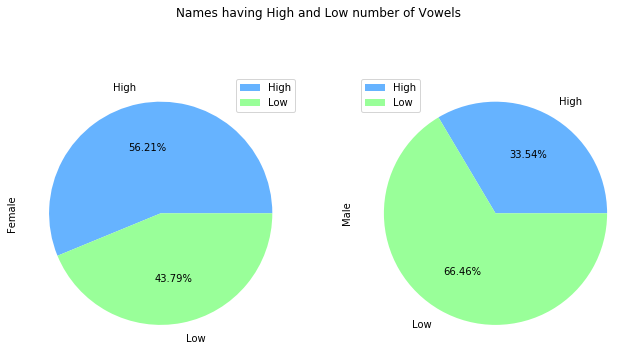

In [186]:
f_h, f_l, m_h, m_l = getRatio(data, 'VowelCountClass', 'high', 'low')
plotRatio(f_h, f_l, m_h, m_l, 'High', 'Low', 'Names having High and Low number of Vowels')

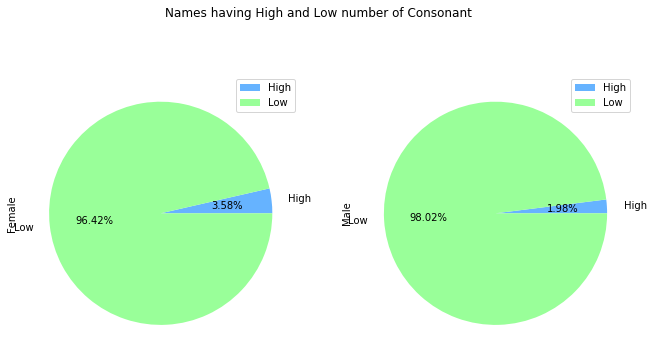

In [187]:
f_h, f_l, m_h, m_l = getRatio(data, 'ConsonantCountClass', 'high', 'low')
plotRatio(f_h, f_l, m_h, m_l, 'High', 'Low', 'Names having High and Low number of Consonant')

#### 2.4.3.2 Creating MoreVowels feature

This is on the basis of the count of vowels compared to count of consonants in one name.

In [188]:
def checkMoreVowels(col):
    if col == 'moreConsonants':
        return 'less'
    return 'more'

In [189]:
data["MoreVowels"] = data["vcCompare"].apply(checkMoreVowels)
data

,Name,Gender,Count,GenderCode,EndsWith,BeginsWith,Length,LengthClass,VowelCount,ConsonantCount,vcCompare,vcDifference,VowelCountClass,ConsonantCountClass,MoreVowels
0,geraldine,female,13,1,vowel,consonant,9,long,4,5,moreConsonants,1,high,low,less
1,gia,female,21,1,vowel,consonant,3,short,2,1,moreVowels,-1,low,high,more
2,gianna,female,49,1,vowel,consonant,6,long,3,3,equal,0,high,low,more
3,giselle,female,38,1,vowel,consonant,7,long,3,4,moreConsonants,1,high,low,less
4,grace,female,36,1,vowel,consonant,5,long,2,3,moreConsonants,1,low,low,less
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29459,alayna,female,10,1,vowel,vowel,6,long,3,3,equal,0,high,low,more
29460,yaritza,female,12,1,vowel,consonant,7,long,3,4,moreConsonants,1,high,low,less
29461,mendel,male,42,0,consonant,consonant,6,long,2,4,moreConsonants,2,low,low,less
29462,isaac,male,21,0,consonant,vowel,5,long,3,2,moreVowels,-1,high,low,more


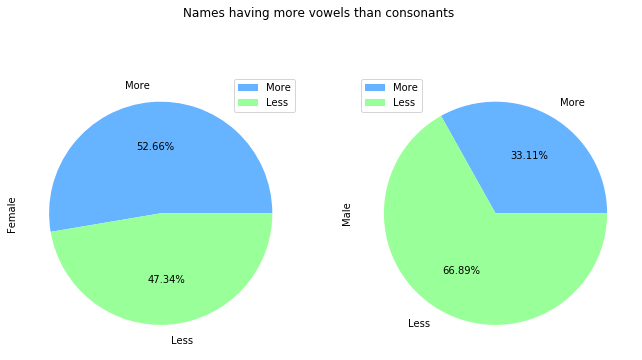

In [190]:
f_h, f_l, m_h, m_l = getRatio(data, 'MoreVowels', 'more', 'less')
plotRatio(f_h, f_l, m_h, m_l, 'More', 'Less', 'Names having more vowels than consonants')

#### 2.4.3.3 Creating VC difference feature
Choosing 0 as a threshold would give the same result as the feature above.

In [191]:
def checkMoreDifference(col):
    if col > 0:
        return 'more'
    return 'less'

In [192]:
data["MoreDifferenceClass"] = data["vcDifference"].apply(checkMoreDifference)
data

,Name,Gender,Count,GenderCode,EndsWith,BeginsWith,Length,LengthClass,VowelCount,ConsonantCount,vcCompare,vcDifference,VowelCountClass,ConsonantCountClass,MoreVowels,MoreDifferenceClass
0,geraldine,female,13,1,vowel,consonant,9,long,4,5,moreConsonants,1,high,low,less,more
1,gia,female,21,1,vowel,consonant,3,short,2,1,moreVowels,-1,low,high,more,less
2,gianna,female,49,1,vowel,consonant,6,long,3,3,equal,0,high,low,more,less
3,giselle,female,38,1,vowel,consonant,7,long,3,4,moreConsonants,1,high,low,less,more
4,grace,female,36,1,vowel,consonant,5,long,2,3,moreConsonants,1,low,low,less,more
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29459,alayna,female,10,1,vowel,vowel,6,long,3,3,equal,0,high,low,more,less
29460,yaritza,female,12,1,vowel,consonant,7,long,3,4,moreConsonants,1,high,low,less,more
29461,mendel,male,42,0,consonant,consonant,6,long,2,4,moreConsonants,2,low,low,less,more
29462,isaac,male,21,0,consonant,vowel,5,long,3,2,moreVowels,-1,high,low,more,less


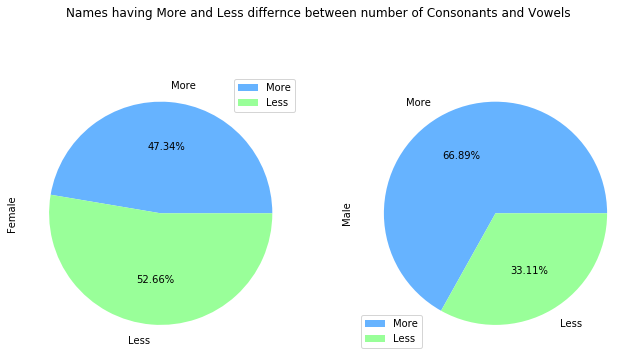

In [193]:
f_h, f_l, m_h, m_l = getRatio(data, 'MoreDifferenceClass', 'more', 'less')
plotRatio(f_h, f_l, m_h, m_l, 'More', 'Less', 'Names having More and Less differnce between number of Consonants and Vowels')

*As predicted, choosing 0 as a threshold gives the same result as the previous feature. Therefore, instead of creating a feature by putting a threshold, we can use the difference of vowels and consonants it self as a feature. So, we should drop the 'MoreDifferenceClass' feature now.*

In [194]:
def dropColumns(data, collist):
    data = data.drop(columns=collist)
    return data

In [195]:
data = dropColumns(data, ['MoreDifferenceClass'])

In [196]:
data

,Name,Gender,Count,GenderCode,EndsWith,BeginsWith,Length,LengthClass,VowelCount,ConsonantCount,vcCompare,vcDifference,VowelCountClass,ConsonantCountClass,MoreVowels
0,geraldine,female,13,1,vowel,consonant,9,long,4,5,moreConsonants,1,high,low,less
1,gia,female,21,1,vowel,consonant,3,short,2,1,moreVowels,-1,low,high,more
2,gianna,female,49,1,vowel,consonant,6,long,3,3,equal,0,high,low,more
3,giselle,female,38,1,vowel,consonant,7,long,3,4,moreConsonants,1,high,low,less
4,grace,female,36,1,vowel,consonant,5,long,2,3,moreConsonants,1,low,low,less
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29459,alayna,female,10,1,vowel,vowel,6,long,3,3,equal,0,high,low,more
29460,yaritza,female,12,1,vowel,consonant,7,long,3,4,moreConsonants,1,high,low,less
29461,mendel,male,42,0,consonant,consonant,6,long,2,4,moreConsonants,2,low,low,less
29462,isaac,male,21,0,consonant,vowel,5,long,3,2,moreVowels,-1,high,low,more


## 2.5 ASCII Values

In [197]:
def getASCII(name):
    asciiVal = 0
    for x in name:
        asciiVal += ord(x)-97
    return asciiVal/len(name)

In [198]:
data["ASCIIval"] = data["Name"].apply(getASCII)
data

,Name,Gender,Count,GenderCode,EndsWith,BeginsWith,Length,LengthClass,VowelCount,ConsonantCount,vcCompare,vcDifference,VowelCountClass,ConsonantCountClass,MoreVowels,ASCIIval
0,geraldine,female,13,1,vowel,consonant,9,long,4,5,moreConsonants,1,high,low,less,7.333333
1,gia,female,21,1,vowel,consonant,3,short,2,1,moreVowels,-1,low,high,more,4.666667
2,gianna,female,49,1,vowel,consonant,6,long,3,3,equal,0,high,low,more,6.666667
3,giselle,female,38,1,vowel,consonant,7,long,3,4,moreConsonants,1,high,low,less,8.857143
4,grace,female,36,1,vowel,consonant,5,long,2,3,moreConsonants,1,low,low,less,5.800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29459,alayna,female,10,1,vowel,vowel,6,long,3,3,equal,0,high,low,more,8.000000
29460,yaritza,female,12,1,vowel,consonant,7,long,3,4,moreConsonants,1,high,low,less,13.285714
29461,mendel,male,42,0,consonant,consonant,6,long,2,4,moreConsonants,2,low,low,less,7.833333
29462,isaac,male,21,0,consonant,vowel,5,long,3,2,moreVowels,-1,high,low,more,5.600000


# 3 Features based on speaker dialouge

List[0] = speaker name   
List [1].append(dialogue)     
References: https://stackoverflow.com/questions/27263805/pandas-column-of-lists-create-a-row-for-each-list-element

In [199]:
def getDialogueData():
    dial = pd.read_csv("../data/dialogue/moviesdialogue.txt", delimiter='\n', names=['Dialogue'])
    dial['Gender'] = np.random.randint(0, 2, dial.shape[0])
    dial['Gender']= np.where(dial['Gender'] == 0, 'male', 'female')
    return dial

In [200]:
dial = getDialogueData()
dial

,Dialogue,Gender
0,Colonel Durnford... William Vereker. I hear yo...,female
1,"Good ones, yes, Mr Vereker. Gentlemen who can ...",female
2,"Your orders, Mr Vereker?",female
3,I'm to take the Sikali with the main column to...,male
4,Lord Chelmsford seems to want me to stay back ...,female
...,...,...
303876,Let's go.,female
303877,She okay?,male
303878,I hope so.,female
303879,They do to!,male


## 3.1 Sentiment Analysis using TextBlob

In [201]:
from textblob import TextBlob

In [202]:
def getPolarity(dialogue):
    return TextBlob(dialogue).sentiment.polarity

In [203]:
dial['PolarityBlob'] = dial['Dialogue'].apply(getPolarity)

In [204]:
dial

,Dialogue,Gender,PolarityBlob
0,Colonel Durnford... William Vereker. I hear yo...,female,0.000000
1,"Good ones, yes, Mr Vereker. Gentlemen who can ...",female,0.700000
2,"Your orders, Mr Vereker?",female,0.000000
3,I'm to take the Sikali with the main column to...,male,0.166667
4,Lord Chelmsford seems to want me to stay back ...,female,0.000000
...,...,...,...
303876,Let's go.,female,0.000000
303877,She okay?,male,0.500000
303878,I hope so.,female,0.000000
303879,They do to!,male,0.000000


In [205]:
def getSentiMentfromPolarity(dial, col, pol):
    dial[col]=''
    dial.loc[dial[pol]>0,col]='Positive'
    dial.loc[dial[pol]==0,col]='Neutral'
    dial.loc[dial[pol]<0,col]='Negative'
    return dial

In [206]:
dial = getSentiMentfromPolarity(dial, 'SentiBlob', 'PolarityBlob')

In [207]:
dial

,Dialogue,Gender,PolarityBlob,SentiBlob
0,Colonel Durnford... William Vereker. I hear yo...,female,0.000000,Neutral
1,"Good ones, yes, Mr Vereker. Gentlemen who can ...",female,0.700000,Positive
2,"Your orders, Mr Vereker?",female,0.000000,Neutral
3,I'm to take the Sikali with the main column to...,male,0.166667,Positive
4,Lord Chelmsford seems to want me to stay back ...,female,0.000000,Neutral
...,...,...,...,...
303876,Let's go.,female,0.000000,Neutral
303877,She okay?,male,0.500000,Positive
303878,I hope so.,female,0.000000,Neutral
303879,They do to!,male,0.000000,Neutral


In [208]:
def getSubjectivity(dialogue):
    return TextBlob(dialogue).sentiment.subjectivity

In [210]:
dial['SubjectivityBlob'] = dial['Dialogue'].apply(getSubjectivity)

In [211]:
dial

,Dialogue,Gender,PolarityBlob,SentiBlob,SubjectivityBlob
0,Colonel Durnford... William Vereker. I hear yo...,female,0.000000,Neutral,0.000000
1,"Good ones, yes, Mr Vereker. Gentlemen who can ...",female,0.700000,Positive,0.600000
2,"Your orders, Mr Vereker?",female,0.000000,Neutral,0.000000
3,I'm to take the Sikali with the main column to...,male,0.166667,Positive,0.333333
4,Lord Chelmsford seems to want me to stay back ...,female,0.000000,Neutral,0.000000
...,...,...,...,...,...
303876,Let's go.,female,0.000000,Neutral,0.000000
303877,She okay?,male,0.500000,Positive,0.500000
303878,I hope so.,female,0.000000,Neutral,0.000000
303879,They do to!,male,0.000000,Neutral,0.000000


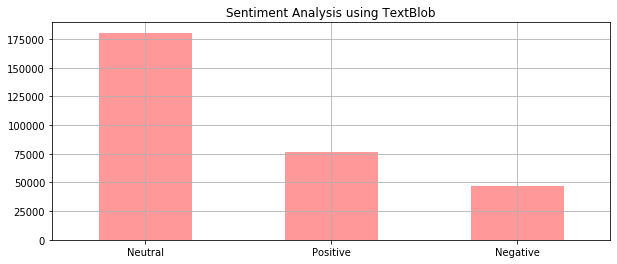

In [212]:
dial['SentiBlob'].value_counts().plot(kind='bar',title="Sentiment Analysis using TextBlob", figsize=(10,4),rot=0, color= "#ff9999", width=0.5, grid=1)

## 3.2 Sentiment Analysis using VADER Scores

In [213]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [214]:
analyzer = SentimentIntensityAnalyzer()

In [215]:
def getPolarityVader(dialogue):
    return analyzer.polarity_scores(dialogue)

In [216]:
dial['VADER'] = dial['Dialogue'].apply(getPolarityVader)
dial

,Dialogue,Gender,PolarityBlob,SentiBlob,SubjectivityBlob,VADER
0,Colonel Durnford... William Vereker. I hear yo...,female,0.000000,Neutral,0.000000,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
1,"Good ones, yes, Mr Vereker. Gentlemen who can ...",female,0.700000,Positive,0.600000,"{'neg': 0.15, 'neu': 0.5, 'pos': 0.35, 'compou..."
2,"Your orders, Mr Vereker?",female,0.000000,Neutral,0.000000,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
3,I'm to take the Sikali with the main column to...,male,0.166667,Positive,0.333333,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
4,Lord Chelmsford seems to want me to stay back ...,female,0.000000,Neutral,0.000000,"{'neg': 0.0, 'neu': 0.894, 'pos': 0.106, 'comp..."
...,...,...,...,...,...,...
303876,Let's go.,female,0.000000,Neutral,0.000000,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
303877,She okay?,male,0.500000,Positive,0.500000,"{'neg': 0.0, 'neu': 0.345, 'pos': 0.655, 'comp..."
303878,I hope so.,female,0.000000,Neutral,0.000000,"{'neg': 0.0, 'neu': 0.408, 'pos': 0.592, 'comp..."
303879,They do to!,male,0.000000,Neutral,0.000000,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."


In [217]:
dial['Compound'] = dial['VADER'].apply(lambda score_dict: score_dict['compound'])

In [218]:
dial = getSentiMentfromPolarity(dial, 'SentiVADER', 'Compound')

In [219]:
dial

,Dialogue,Gender,PolarityBlob,SentiBlob,SubjectivityBlob,VADER,Compound,SentiVADER
0,Colonel Durnford... William Vereker. I hear yo...,female,0.000000,Neutral,0.000000,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
1,"Good ones, yes, Mr Vereker. Gentlemen who can ...",female,0.700000,Positive,0.600000,"{'neg': 0.15, 'neu': 0.5, 'pos': 0.35, 'compou...",0.4939,Positive
2,"Your orders, Mr Vereker?",female,0.000000,Neutral,0.000000,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
3,I'm to take the Sikali with the main column to...,male,0.166667,Positive,0.333333,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
4,Lord Chelmsford seems to want me to stay back ...,female,0.000000,Neutral,0.000000,"{'neg': 0.0, 'neu': 0.894, 'pos': 0.106, 'comp...",0.0772,Positive
...,...,...,...,...,...,...,...,...
303876,Let's go.,female,0.000000,Neutral,0.000000,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
303877,She okay?,male,0.500000,Positive,0.500000,"{'neg': 0.0, 'neu': 0.345, 'pos': 0.655, 'comp...",0.2263,Positive
303878,I hope so.,female,0.000000,Neutral,0.000000,"{'neg': 0.0, 'neu': 0.408, 'pos': 0.592, 'comp...",0.4404,Positive
303879,They do to!,male,0.000000,Neutral,0.000000,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral


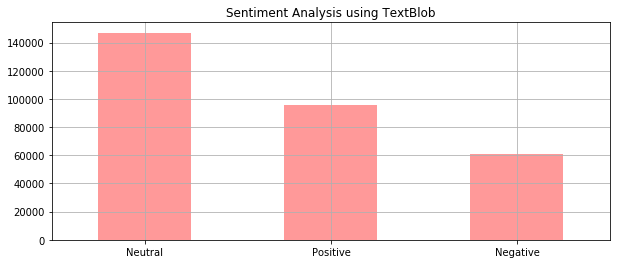

In [220]:
dial['SentiVADER'].value_counts().plot(kind='bar',title="Sentiment Analysis using TextBlob", figsize=(10,4),rot=0, color= "#ff9999", width=0.5, grid=1)

## 3.4 Structural Features

### 3.4.1 Average number of tokens per dialogue

In [221]:
from lexicalrichness import LexicalRichness

In [222]:
def getLex(dialogue):
    return lexicalrichness(text)

In [223]:
def getAverageTokens(lex):
    return lex.words

### 3.4.2 Average token length per dialogue

### 3.4.3 Type to Token ratio

In [224]:
def getTTR(lex):
    return lex.ttr

### 3.4.4 Measure of Textual Lexical Diversity

In [225]:
def getMTLD(lex):
    return lex.mtld(threshold=0.72)

### 3.4.5 Hypergeometric Distribution Diversity

In [ ]:
def getHDD(lex):
    return lex.hdd(draws=42)

## 3.3 Valence, Arousal and Dominance score of dialogues

In [91]:
def importVADscores():
    scores = pd.read_csv("../data/dialogue/VAD-scores.csv", delimiter='\t', encoding='utf-8')
    scores = scores.rename(columns={"arousal (a.scores.tsv)": "Arousal"})
    valence = dict(zip(scores['term'], scores['valence']))
    arousal = dict(zip(scores['term'], scores['arousal']))
    dominance = dict(zip(scores['term'], scores['dominance']))
    
    return valence, arousal, dominance

In [92]:
valence, arousal, dominance = importVADscores()

In [93]:
stop = list(text.ENGLISH_STOP_WORDS)

In [103]:
def VADscore(dialogue, dial):
    v=0.0
    d=0.0
    a=0.0
    
    dialogue = re.sub(r'[^\w\s]','',dialogue)
    words = nlp(dialogue)
    
    count = 0
    
    for x in words:
        x = x.lemma_
        if x not in stop:
            try:
                v += valence[x]
                count += 1
            except:
                v += 0
            try:
                d += dominance[x]
            except:
                d += 0
            try:
                a += arousal[x]
            except:
                a+=0
    
    if count:
        return v/count, a/count, d/count
    else:
        return v,a,d

In [104]:
dial['Valence'] = dial['Dialogue'].apply(lambda x: VADscore(x, dial)[0])
dial['Arousal'] = dial['Dialogue'].apply(lambda x: VADscore(x, dial)[1])
dial['Dominance'] = dial['Dialogue'].apply(lambda x: VADscore(x, dial)[2])

KeyboardInterrupt: 

In [ ]:
dial

In [87]:
def getVADStat(data, group):
    male = data.loc[data['Gender'] == 'male']
    female = data.loc[data['Gender'] == 'female']
    
    maleLen = pd.DataFrame(male.groupby(group).count()).reset_index(level=group)
    femaleLen = pd.DataFrame(female.groupby(group).count()).reset_index(level=group)
    
    maleLen = maleLen.drop([0, 0])
    femaleLen = femaleLen.drop([0, 0])
   
    print(maleLen)
    print(femaleLen)
    
    index= maleLen[group]
    df = pd.DataFrame({'Female': femaleLen['Dialogue'], 'Male': maleLen['Dialogue']}, index=index)
    ax = df.plot.barh(figsize=(5,30),rot=0, color={"Female": "#ffb3e6", "Male": "#c2c2f0"}, width=0.7, grid=1, ylabel="Count of Names")

       Valence  Dialogue  Gender  Arousal  Dominance
1        0.005         6       6        6          6
2        0.010        80      80       80         80
3        0.012        13      13       13         13
4        0.019         1       1        1          1
5        0.020       265     265      265        265
...        ...       ...     ...      ...        ...
15721   35.308         1       1        1          1
15722   35.763         1       1        1          1
15723   37.268         1       1        1          1
15724   57.122         1       1        1          1
15725   92.408         1       1        1          1

[15725 rows x 5 columns]
       Valence  Dialogue  Gender  Arousal  Dominance
1        0.005         9       9        9          9
2        0.008         1       1        1          1
3        0.010        92      92       92         92
4        0.012         7       7        7          7
5        0.019         1       1        1          1
...        ...      

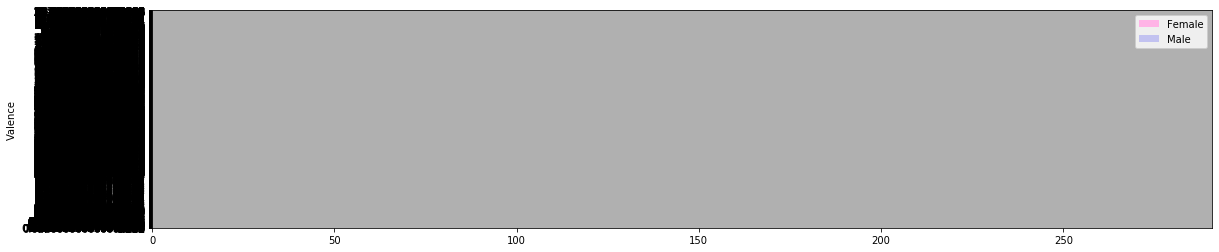

In [88]:
getVADStat(dial, 'Valence')

In [174]:
getStat(dial, 'Arousal')

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x12aff8e18> (for post_execute):


KeyboardInterrupt: 

In [ ]:
getStat(dial, 'Dominance')